In [27]:
pip install seaborn

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('AB_NYC_2019.csv')

Saving AB_NYC_2019.csv to AB_NYC_2019 (1).csv


In [82]:
df = pd.read_csv('AB_NYC_2019.csv')

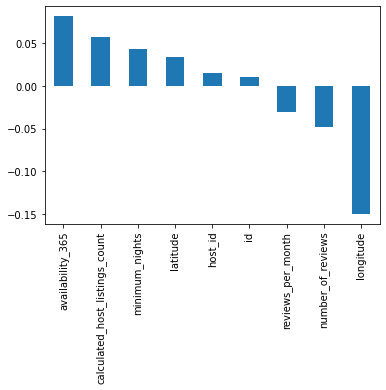

In [66]:
corr_with_sale_price = df.corr()["price"].sort_values(ascending=False)
corr_with_sale_price.drop("price").plot.bar()
plt.show();

In [67]:
df.price = np.log1p(df.price)

In [67]:

sns.distplot(df['price'])

In [68]:
import warnings
def ignore_warn(*args, **kwargs):
 pass
 warnings.warn = ignore_warn
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNetCV, ElasticNet
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold


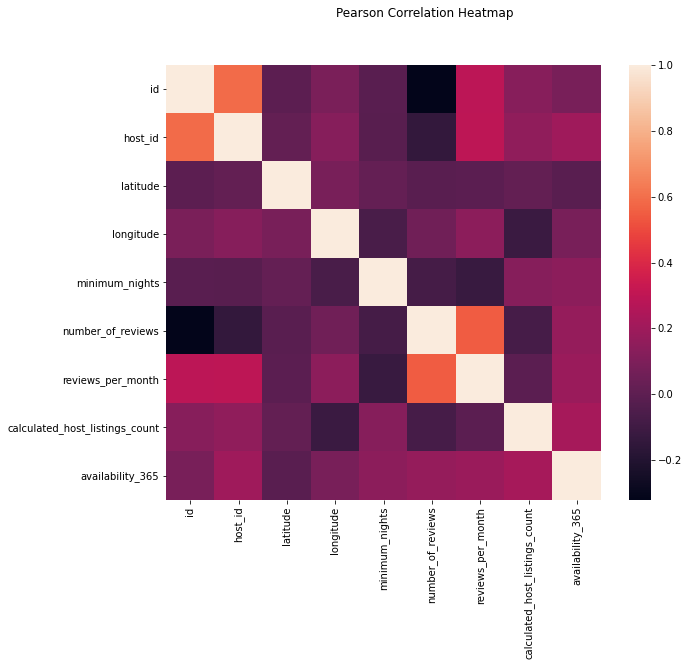

In [69]:
pd.set_option('precision',2)
plt.figure(figsize=(10, 8))
sns.heatmap(df.drop(['price'],axis=1).corr(), square=True)
plt.suptitle("Pearson Correlation Heatmap")
plt.show();

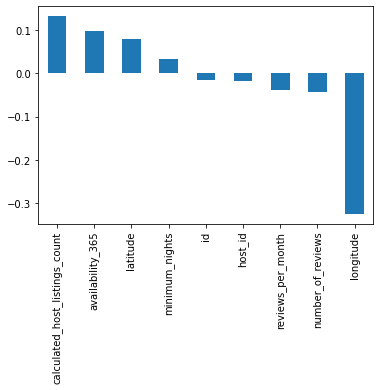

In [70]:
corr_with_sale_price = df.corr()["price"].sort_values(ascending=False)
corr_with_sale_price.drop("price").plot.bar()
plt.show();

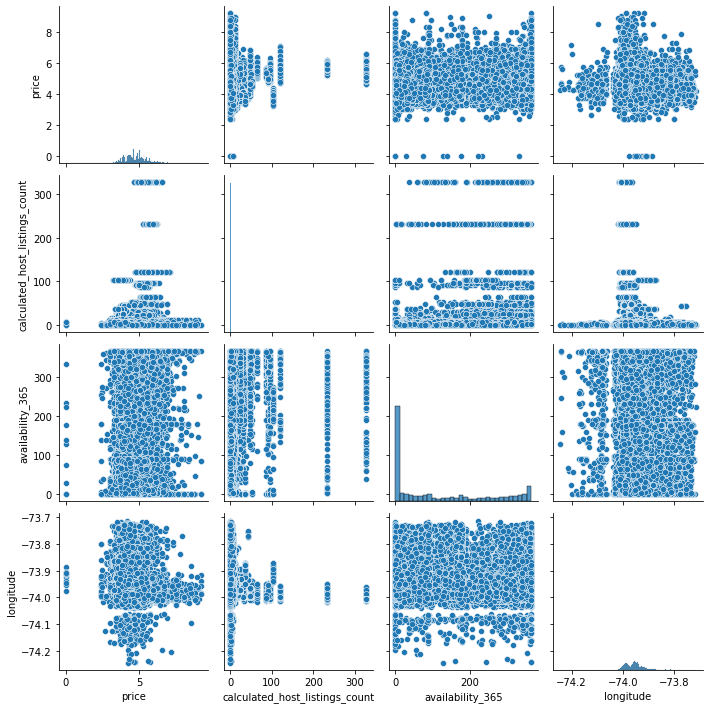

In [71]:
sns.pairplot(df[['price', 'calculated_host_listings_count','availability_365', 'longitude']])
plt.show();

In [72]:
df2=df[['price', 'calculated_host_listings_count','availability_365', 'longitude']]

In [73]:

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(df2,df.price,test_size = 0.2,random_state = 100)

In [74]:
x_train.head()

,price,calculated_host_listings_count,availability_365,longitude
20958,5.451,1,13,-74.003
31695,4.836,1,0,-73.941
34126,4.754,1,72,-73.958
32988,3.689,1,0,-73.912
7539,4.625,1,365,-73.950


In [75]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm = lm.fit(x_train,y_train)   #lm.fit(input,output)

In [76]:
lm.coef_

array([ 1.00000000e+00, -8.92434778e-15,  5.24111405e-16,  7.45330345e-17])

In [77]:
coefficients = pd.concat([pd.DataFrame(x_train.columns),pd.DataFrame(np.transpose(lm.coef_))], axis = 1)

In [78]:
coefficients

,0,0
0,price,1.000
1,calculated_host_listings_count,-0.000
2,availability_365,0.000
3,longitude,0.000


In [79]:
lm.intercept_

1.7763568394002505e-14

In [80]:
y_pred = lm.predict(x_test)
y_error = abs(y_test - y_pred)
y_error

41320   0.000
12273   0.000
33301   0.000
24371   0.000
35479   0.000
         ... 
19616   0.000
46815   0.000
28210   0.000
26245   0.000
33322   0.000
Name: price, Length: 9779, dtype: float64

In [81]:
y_error.mean()

8.67031003071722e-14